In [32]:
import pandas as pd
import string

# Besede in naglasi

Najprej preberemo seznam besed in naglašenih črk v besedah; te moramo nato pretvoriti v bolj oprijemljiv zapis.

Pri določanju zlogov poiščemo vse izolirane samoglasnike in jih proglasimo za svoj zlog. 
Samoglasniki, ki ne spadajo v ASCII, so poudarjeni (pri tem enako obravnamo tudi zlogotvorni _r_), ostali niso.

In [33]:
vse_besede = pd.read_csv("obdelani_podatki/besede.csv", names=["beseda", "poudarjena_beseda"])

In [34]:
vse_besede

,beseda,poudarjena_beseda
0,Pierre,Pierré
1,Pierra,Piérra
2,Pierrea,Pierréa
3,Pierru,Piérru
4,Pierreu,Pierréu
...,...,...
933101,zanj,zánj
933102,zanjo,zánjo
933103,zanju,zánju
933104,zanje,zánje


In [35]:
# Poiščimo vse črke v besedah, ki ne spadajo v ASCII
# Te potrebujemo, da lahko določimo, kaj je samoglasnik

def neznane_crke(beseda):
    return {x for x in beseda if ord(x) > 0x7f}

vse_neznanke = set()
for s in vse_besede['poudarjena_beseda'].apply(neznane_crke).values:
    vse_neznanke.update(s)

neznanke = "".join(vse_neznanke)
neznanke

'íüÉöµóčšŕŽÚäĆëÖĐćđéÓÁŠÍážČŔú'

In [36]:
def poudarjeni_zlogi(poudarjena_beseda):
    """Pretvori zapis s poudarjenimi znaki v zapis zlogov. Znak '-' pomeni poudarjen zlog, 'u' pa nepoudarjen.
        'zánju' -> '-u'
    """

    def je_samoglasnik(ch):
        return ch in 'aeiouAEIOUöëÁóÓŕÚŔúáÖÍíäüÉé'

    def je_poudarjen(samoglasnik):
        if len(samoglasnik) == 1:
            return samoglasnik not in "aeiou"
        else:
            return any(je_poudarjen(ch) for ch in samoglasnik)

    samoglasniki = []
    for i, ch in enumerate(poudarjena_beseda):
        if je_samoglasnik(ch):
            if i >= 1 and je_samoglasnik(poudarjena_beseda[i-1]):
                # samoglasnik ni izoliran
                samoglasniki[-1] += ch
            else:
                samoglasniki.append(ch)
    
    return "".join(map(lambda ch: '-' if je_poudarjen(ch) else 'u', samoglasniki))

vse_besede['zlogi'] = vse_besede.poudarjena_beseda.apply(poudarjeni_zlogi)
vse_besede

,beseda,poudarjena_beseda,zlogi
0,Pierre,Pierré,u-
1,Pierra,Piérra,-u
2,Pierrea,Pierréa,u-
3,Pierru,Piérru,-u
4,Pierreu,Pierréu,u-
...,...,...,...
933101,zanj,zánj,-
933102,zanjo,zánjo,-u
933103,zanju,zánju,-u
933104,zanje,zánje,-u


In [37]:
# Pripravimo si zgoščevalno tabelo besed in zlogov, da lahko v nadaljevanju hitreje opravimo analizo
besede_zlogi = {}
for beseda, zlog in zip(vse_besede.beseda, vse_besede.zlogi):
    besede_zlogi[beseda.lower()] = zlog
besede_zlogi

{'pierre': 'u-',
 'pierra': '-u',
 'pierrea': 'u-',
 'pierru': '-u',
 'pierreu': 'u-',
 'pierrom': 'uu',
 'pierreom': 'u-',
 'pierrov': '-u',
 'pierreov': 'u-',
 'pierroma': '-uu',
 'pierreoma': 'u-u',
 'pierrih': '-u',
 'pierreih': 'u-',
 'pierri': '-u',
 'pierrei': 'u-',
 'pierree': 'u-',
 'shakespeare': 'uu-u',
 'shakespeara': 'uu-u',
 'shakespearja': 'uu-u',
 'shakespearea': 'uuu-',
 'shakespeareja': 'uuu-u',
 'shakespearju': 'uu-u',
 'shakespearu': 'uu-u',
 'shakespeareu': 'uuu-',
 'shakespeareju': 'uuu-u',
 'shakespearjem': 'uu-u',
 'shakespearom': 'uu-u',
 'shakespeareom': 'uuuu',
 'shakespearejem': 'uuu-u',
 'shakespearjev': 'uuuu',
 'shakespearov': 'uu-u',
 'shakespeareov': 'uu-u',
 'shakespearejev': 'uuu-u',
 'shakespearjema': 'uuuuu',
 'shakespearoma': 'uu-uu',
 'shakespearejema': 'uuu-uu',
 'shakespeareoma': 'uuu-u',
 'shakespearih': 'uu-u',
 'shakespearjih': 'uu-u',
 'shakespeareih': 'uuu-',
 'shakespearejih': 'uuu-u',
 'shakespeari': 'uu-u',
 'shakespearji': 'uu-u',
 'sha

# Podatki

Sedaj preberemo podatke o virih, kategorijah in literarnih delih.

In [38]:
literarna_dela = pd.read_csv("obdelani_podatki/podatki.csv", names=["vir", "naslov", "avtor", "besedilo", "leto"])
literarna_dela

,vir,naslov,avtor,besedilo,leto
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",Janko Orožen,"\nPod Tovstom je slikovita in ozka soteska, ki...",-1
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,Janko Orožen,\nNa težko dostopnem vrhu Dobrovlja je stal ne...,-1
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,Janko Orožen,"\nOb cesti, ki vodi pod Marnim na Dol, je kape...",-1
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",Janko Orožen,\nVipota! Kdo je ne pozna! S svojo piramidasto...,-1
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",Stanko Vraz,"\n""Pisarska"", praviš, ""reč je ničemurna:\n\nde...",1952
...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,Janko Orožen,\nNekoč se je širilo jezero od Gradišča do Ška...,-1
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",Ivan Vdovič,"Krasna je zemlja slovenska. Na mejah, ki dele ...",1895
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",NaN,"Von Franz Žnideršič,\nk. k. Professor. Gorz. D...",1903
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,NaN,"V petek, dne 17. julija je umrl v\nrodni hiši ...",1903


In [39]:
viri = pd.read_csv("obdelani_podatki/viri.csv", names=["povezava", "tip"])
viri

,povezava,tip
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,knjiga
1,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,knjiga
2,https://sl.wikisource.org/wiki/%22%C5%A0tok%22...,knjiga
3,https://sl.wikisource.org/wiki/A._Pretnarjevih...,poezija
4,https://sl.wikisource.org/wiki/Abecedni_seznam...,ljudsko slovstvo
...,...,...
625,https://sl.wikisource.org/wiki/%C5%BDolcpa%C5%...,zbrano delo
626,https://sl.wikisource.org/wiki/%C5%BDupanova_M...,antikvarno gradivo
627,https://sl.wikisource.org/wiki/%C5%BDivotopis_...,separat
628,https://sl.wikisource.org/wiki/%C5%BDolcpa%C5%...,zbrano delo


In [40]:
kategorije = pd.read_csv("obdelani_podatki/kategorije.csv", names=["povezava", "kategorija"])
kategorije

,povezava,kategorija
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,Objavljeno s pisnim dovoljenjem
1,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,Dela-G
2,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,Objavljeno s pisnim dovoljenjem
3,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,Dela-G
4,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,Objavljeno s pisnim dovoljenjem
...,...,...
58791,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,Dela leta 1903
58792,https://sl.wikisource.org/wiki/%E2%80%A0P._Lev...,V javni lasti
58793,https://sl.wikisource.org/wiki/%E2%80%A0P._Lev...,Dela-P
58794,https://sl.wikisource.org/wiki/%E2%80%A0P._Lev...,Slovan (1902)


In [41]:
# Definiramo pomožne funkcije za pripravo pretvorbe besedil v zaporedje zlogov
def standardiziraj_whitespace(besedilo):
    besedilo = "".join(" " if ch.isspace() else ch for ch in besedilo)
    while "  " in besedilo:
        besedilo = besedilo.replace("  ", " ")
    return besedilo.strip()

def pripravi_besedilo(besedilo):
    """Odstrani vse nečrkovne in ne-whitespace znake, ter standardiziraj whitespace"""
    sprejeti_znaki = string.ascii_letters + neznanke + " "
    besedilo = standardiziraj_whitespace(besedilo)
    return "".join(ch for ch in besedilo if ch in sprejeti_znaki)

In [43]:
def pretvori_v_zloge(pripravljeno_besedilo):
    """Pretvori besedilo v zaporedje zlogov. V zaporedju ne ohranimo mej med besedami."""
    besede = pripravljeno_besedilo.split()
    zlogi = ""
    for beseda in besede:
        if beseda.lower() in besede_zlogi:
            zlogi += besede_zlogi[beseda.lower()]
        else:
            # če besede slučajno ni, obstaja možnost, da je zapisana s poudarjenimi zlogi
            # takrat jih interpoliramo na mestu
            # sicer bo funkcija vrnila same nepoudarjene zloge, kar ni optimalno, ampak
            # glede tega ne moramo narediti ravno veliko
            zlogi += poudarjeni_zlogi(beseda.lower())
    return zlogi

literarna_dela["zaporedje_zlogov"] = literarna_dela.besedilo.apply(lambda s: pretvori_v_zloge(pripravi_besedilo(s)))
literarna_dela
# ta celica se izvaja malce dlje časa (~80 sekund)

,vir,naslov,avtor,besedilo,leto,zaporedje_zlogov
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",Janko Orožen,"\nPod Tovstom je slikovita in ozka soteska, ki...",-1,uuu-uu-uu-uu-uuuuu-uu-u-u-u-u-u-u-u-u-uu-u-u-u...
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,Janko Orožen,\nNa težko dostopnem vrhu Dobrovlja je stal ne...,-1,u-uu-u-uuuu--u-u-u-u---u-uuu-uu-uu-uuu-uu----u...
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,Janko Orožen,"\nOb cesti, ki vodi pod Marnim na Dol, je kape...",-1,-u-u-uuuuu--u-uu-u-u-uu-u--u--u-u-u-u--uu-uuuu...
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",Janko Orožen,\nVipota! Kdo je ne pozna! S svojo piramidasto...,-1,uuu---u--uuu-uuu-u-uu-u-uuuuu-u--uuu-uuu---u-u...
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",Stanko Vraz,"\n""Pisarska"", praviš, ""reč je ničemurna:\n\nde...",1952,uuu-u--uuuuu-u-u-uuuuu---u-uu-uu-uuu--u-u-u--u...
...,...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,Janko Orožen,\nNekoč se je širilo jezero od Gradišča do Ška...,-1,u-u--uuuuuuu-uu--uuu-u-uu-uu-uuu-u--uu--uuu-uu...
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",Ivan Vdovič,"Krasna je zemlja slovenska. Na mejah, ki dele ...",1895,u---uu-uu-uu-uu-uu-uu-uuuuuuu-uu-uuuu-uu-u-uu-...
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",NaN,"Von Franz Žnideršič,\nk. k. Professor. Gorz. D...",1903,u-uuuuuu-uu-uuu-uuuu--uuuu-uu-u-uuuuu-u-u-u-u-...
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,NaN,"V petek, dne 17. julija je umrl v\nrodni hiši ...",1903,-u-u-u-u--u-uuuu-uuuu-u---uuuu-u-u-uu--uu---u-...


# Površinska analiza

Prvo vprašanje se nanaša na razmerje med številom poudarjenih in številom nepoudarjenih zlogov v besedilu.
Hipoteza je, da ima večina besedil več nepoudarjenih zlogov kot poudarjenih.

In [44]:
vir_naslov_zlogi = literarna_dela[["vir", "naslov", "zaporedje_zlogov"]].copy()
vir_naslov_zlogi["st_nepoudarjenih"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: s.count("u"))
vir_naslov_zlogi["st_poudarjenih"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: s.count("-"))

# zelo kratka besedila nas ne zanimajo
zanimivi = vir_naslov_zlogi[vir_naslov_zlogi.st_poudarjenih + vir_naslov_zlogi.st_nepoudarjenih > 10].copy()
zanimivi["razmerje"] = zanimivi.st_poudarjenih / zanimivi.st_nepoudarjenih
zanimivi.sort_values(by="razmerje")

,vir,naslov,zaporedje_zlogov,st_nepoudarjenih,st_poudarjenih,razmerje
591,https://sl.wikisource.org/wiki/Blabla,Blabla,-uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu...,56,5,0.089286
10094,https://sl.wikisource.org/wiki/Sedmo_pismo_F._...,"Sedmo pismo Franceta Prešerna Stanku Vrazu, Lj...",uuuu-uu-uuuuuuuuuuuuu-uuuuuu-uuuu-uuuuuuuuuuuu...,411,44,0.107056
12916,https://sl.wikisource.org/wiki/Vorred,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",--uuuuu-u-uuu-uu-uu-uu-uuuuuuuuuuuuuuu-uuuuuuu...,118,14,0.118644
866,https://sl.wikisource.org/wiki/Bri%C5%BEinski_...,II. brižinski spomenik,u-u-uuuuuuuuuu-u-uuuuu-uuuuuu-uuuuuuuuuuuu-uuu...,711,85,0.119550
2530,https://sl.wikisource.org/wiki/II._bri%C5%BEin...,II. brižinski spomenik,u-u-uuuuuuuuuu-u-uuuuu-uuuuuu-uuuuuuuuuuuu-uuu...,711,85,0.119550
...,...,...,...,...,...,...
3596,"https://sl.wikisource.org/wiki/Kar_je,_be%C5%BEi","Kar je, beži",--u-----u-u-uuu----u-u--,8,16,2.000000
3204,https://sl.wikisource.org/wiki/KLIP_KLOP,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,10,21,2.100000
3771,https://sl.wikisource.org/wiki/Klip_klop,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,10,21,2.100000
879,https://sl.wikisource.org/wiki/Br%C5%BE_domov,Brž domov,-u-u----u-u----u-u----u-u--u,9,19,2.111111


In [47]:
len(zanimivi[zanimivi.razmerje < 1]) / len(zanimivi)

0.943682162604956

Velika večina dovolj dolgih besedil ima torej več nepoudarjenih zlogov kot poudarjenih.
Naslednja hipoteza je, da imajo leposlovna besedila več poudarjenih zlogov kot neleposlovna, ter da ima poezija največje razmerje med poudarjenimi in nepoudarjenimi zlogi, ker se vsaj starejša večinoma držijo stopice; ta pa zahteva neko minimalno razmerje (npr. jamb 1:1, amfibrah 1:2, itd.). 
Zgodbe, romani in podobna druga dela pa dovoljujejo daljše besede, ki imajo lahko tudi več nepoudarjenih zlogov.

Vredno je poudariti, da je podatkov o tipu dela zelo malo v primerjavi z vsemi deli (630 proti 14 tisoč), tako da ta primerjava ni dokončna.

<AxesSubplot:xlabel='tip'>

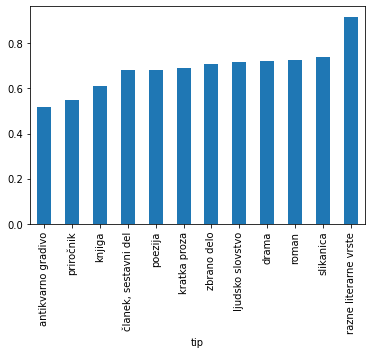

In [95]:
vrste = pd.merge(zanimivi, viri, left_on="vir", right_on="povezava").groupby("tip")
r = vrste.razmerje.count()
vrste.razmerje.mean()[r>5].sort_values().plot.bar()

In [92]:
r[r>5]

tip
antikvarno gradivo        11
drama                      6
knjiga                    66
kratka proza              32
ljudsko slovstvo         169
poezija                   35
priročnik                 13
razne literarne vrste    142
roman                     55
slikanica                 14
zbrano delo               48
članek, sestavni del      10
Name: razmerje, dtype: int64

Rezultat je do neke mere pričakovan, do neke pa ne. 
Antikvarna dela, priročniki, knjige in članki so neleposlovna dela, in imajo res manjše razmerje kot leposlovna. 
Med preostalimi deli pa je poezija imela ravno najmanjše razmerje, kar je v popolnem nasprotju s hipotezo.